#  Data Piplelie: Videogame Sales Analysis
## The use of RDF, RDFS knowledge, and SPARQL Query

Group 28: Taina, Lisa, Divabelle, Ashilla

### Project Objective


This project is aimed to create a notebook application with data visualizations relevant to video games.   


This notebook shows:   
1.1 A table with the ten most popular games and their descriptions.   
1.2 A table with the top ten games and their descriptions according to user ratings.    
1.3 A table with the top ten games and their descriptions according to critic ratings.    
2.1 A bar chart to visualize data about the ratings and the game console.   
2.2 A bar chart to visualize data about the ratings and the genre.   
3.1 A scatter plot to represent the sales of video games and its user rating.   
3.2 A scatter plot to represent the sales of video games and its critic rating.   
3.3 A scatter plot to represent the sales of video games and its average rating.   
4.1 A world map of the sales of a video game per country or area where the sales of the video game are 
expressed by the color of the area.    
4.1 A World map that presents of the location video game publisher and developer headquarters and their total profit.    

Instruction:

Please run the cells in the order specified in this notebook

**Note that you need to have an active internet connection to run the code in this notebook.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

def convertURI(columnURI):
    split = columnURI.str.split("/",expand = True)
    return split[split.columns[-1]]

### Important:

Please run the cell below before running another cells to get the results.

In [2]:
%load_ext ipython_sparql_pandas

## 1.1: Table with Popular Games and their description

Run the cells below to get a representation of a table that shows the 10 most popular games based on their total sales.

In [3]:
%%sparql http://localhost:7200/repositories/VGR -qs popularGame
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT distinct ?game ?console ?sales ?AVGRating ?description  where {
    ?game rdf:type vg:PopularVideoGame ;
         vg:hasNASales ?NA ;
         vg:hasEUSales ?EU ;
         vg:hasJPSales ?JP ;
         vg:hasOtherSales ?Other ;
         vg:isPlayedOn ?console ;
         vg:hasDescription ?description . 
    BIND((?NA+?EU+?JP+?Other) as ?sales) .
    OPTIONAL{?game rdf:type vg:HighlyRatedVideoGame ;
        vg:hasCriticRating ?CriticRating ;
        vg:hasUserRating ?UserRating . 
            BIND ((((?CriticRating/10)+?UserRating)/2) as ?AVGRating)}
} order by desc(?sales)
Limit 10

In [4]:
popularGame.columns = ['VideoGame', 'Console', 'Sales (x 1 million)', 'Average rating', 'Description']
pd.set_option('display.max_colwidth', None)
popularGame["VideoGame"] = convertURI(popularGame["VideoGame"])
popularGame["Console"] = convertURI(popularGame["Console"])
popularGame

,VideoGame,Console,Sales (x 1 million),Average rating,Description
0,Mario_Kart_Wii_Wii,Wii,35.520000,NaN,"Mario Kart Wii is a 2008 kart racing video game developed and published by Nintendo for the Wii. It is the sixth installment in the Mario Kart series and was released worldwide in April 2008.Like its previous installments, Mario Kart Wii incorporates playable characters from the Mario series, who participate in kart races on 32 different race tracks using specialized items to hinder opponents or gain advantages."
1,Wii_Sports_Resort_Wii,Wii,32.770000,NaN,"Wii Sports Resort is a 2009 sports simulation video game developed and published by Nintendo for the Wii video game console, and is a sequel to Wii Sports. It is one of the first titles to require the Wii MotionPlus accessory, which was bundled with the game. Wii Sports Resort was first announced at E3 2008 and was released in Japan on June 25, 2009 and in nearly all other regions in the following month."
2,Wii_Play_Wii,Wii,28.910000,NaN,"Wii Play is a party video game developed and published by Nintendo for the Wii console. It was released as a launch game for the console in Japan, Europe, and Australia, and was released in North America in February 2007."
3,Grand_Theft_Auto_San_Andreas_PS2,PS2,20.810000,9.25,"Grand Theft Auto: San Andreas is a 2004 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the seventh game in the Grand Theft Auto series, following Grand Theft Auto: Vice City (2002). It was released in October 2004 for PlayStation 2, and in June 2005 for Microsoft Windows and Xbox. The game is set within an open world environment that players can explore and interact with at their leisure."
4,Grand_Theft_Auto_V_X360,X360,16.270000,8.90,Grand Theft Auto V is a 2013 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the first main entry in the Grand Theft Auto series since 2008's Grand Theft Auto IV.
5,Grand_Theft_Auto_Vice_City_PS2,PS2,16.150000,9.10,"Grand Theft Auto: Vice City is a 2002 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the fourth main entry in the Grand Theft Auto series, following 2001's Grand Theft Auto III. Set in 1986 within the fictional Vice City, based on Miami, the single-player story follows mobster Tommy Vercetti's rise to power after his release from prison and being caught up in an ambushed drug deal."
6,Call_of_Duty_Black_Ops_II_PS3,PS3,13.789999,NaN,"Call of Duty: Black Ops II is a 2012 first-person shooter video game developed by Treyarch and published by Activision. It was released for Microsoft Windows, PlayStation 3, and Xbox 360 on November 12, 2012, and for the Wii U on November 18 in North America and November 30 in PAL regions. Black Ops II is the ninth game in the Call of Duty franchise of video games, a sequel to the 2010 game Call of Duty: Black Ops and the first Call of Duty game for the Wii U."
7,Call_of_Duty_Black_Ops_II_X360,X360,13.679999,NaN,"Call of Duty: Black Ops II is a 2012 first-person shooter video game developed by Treyarch and published by Activision. It was released for Microsoft Windows, PlayStation 3, and Xbox 360 on November 12, 2012, and for the Wii U on November 18 in North America and November 30 in PAL regions. Black Ops II is the ninth game in the Call of Duty franchise of video games, a sequel to the 2010 game Call of Duty: Black Ops and the first Call of Duty game for the Wii U."
8,Call_of_Duty_Modern_Warfare_3_PS3,PS3,13.330000,6.00,"Call of Duty: Modern Warfare 3 is a 2011 first-person shooter video game, jointly developed by Infinity Ward and Sledgehammer Games and published by Activision. The game was released worldwide in November 2011 for Microsoft Windows, the Xbox 360, PlayStation 3, and Wii. It is the third and final installment in the original Modern Warfare saga, a direct sequel to 2009's Call of Duty: Modern Warfare 2, and the eighth Call of Duty installment overall."
9

## 1.2: Table with Video Games with the Highest User Rating

Run the cells below to get a representation of a table that shows the 10 video games with the highest user ratings.

In [5]:
%%sparql http://localhost:7200/repositories/VGR -qs highUserRatedGame
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT distinct ?game ?console ?userRating ?sales ?description  where {
    ?game rdf:type vg:HighlyUserRattedVideoGame ;
         vg:hasUserRating ?userRating;
         vg:hasNASales ?NA ;
         vg:hasEUSales ?EU ;
         vg:hasJPSales ?JP ;
         vg:hasOtherSales ?Other ;
         vg:isPlayedOn ?console ;
         vg:hasDescription ?description . 
    BIND((?NA+?EU+?JP+?Other) as ?sales) .
} order by desc(?userRating)
Limit 10

In [6]:
highUserRatedGame.columns = ['VideoGame', 'Console', 'User rating', 'Sales (x 1 million)', 'Description']
pd.set_option('display.max_colwidth', None)
highUserRatedGame["VideoGame"] = convertURI(highUserRatedGame["VideoGame"])
highUserRatedGame["Console"] = convertURI(highUserRatedGame["Console"])
highUserRatedGame

,VideoGame,Console,User rating,Sales (x 1 million),Description
0,Karnaaj_Rally_GBA,GBA,9.5,0.01,"Karnaaj Rally is a racing and vehicular combat game for the Game Boy Advance handheld video game console. It was released on November 21, 2002. The game was well received by critics. It was re-released on UIQ3 platforms as K-Rally in 2007."
1,Wade_Hixtons_Counter_Punch_GBA,GBA,9.5,0.01,"Wade Hixton's Counter Punch is a boxing video game for Game Boy Advance. Its gameplay has been favorably compared to Punch-Out!!.Before release, the game was known as Sadistic Boxing and Sucker Punch."
2,Paper_Mario_The_Thousand-Year_Door_GC,GC,9.4,2.25,"Paper Mario: The Thousand-Year Door is a 2004 role-playing video game developed by Intelligent Systems and published by Nintendo for the GameCube. The Thousand-Year Door is the second game in the Paper Mario series following Paper Mario, and is part of the larger Mario franchise."
3,Deus_Ex_PC,PC,9.3,0.01,"Deus Ex is a series of role-playing video games formerly owned by Eidos Interactive and after 2009 by Square Enix Europe. The first two games in the series were developed by Ion Storm, and subsequent entries were developed by Eidos Montréal, following Ion Storm's closure."
4,X-Men_The_Official_Game_GBA,GBA,9.3,0.07,"X-Men: The Official Game (also known as X3: The Official Game) is the name of Activision's three tie-in video games to the 2006 film X-Men: The Last Stand. The game covers the events between the films X2 and X-Men: The Last Stand, specifically following the characters of Logan, Iceman, and Nightcrawler."
5,Swingerz_Golf_GC,GC,9.3,0.08,"Swingerz Golf (Ace Golf in Europe and Wai Wai Golf (わいわいゴルフ, Wai Wai Gorufu, ""Wai Wai Golf"") in Japan) is a sports video game released by Telenet Japan in 2002. It is a golf simulation game that allows the player to choose from 14 different characters, each with different strengths and weaknesses, to play on any of the game's 6 courses, varying greatly in difficulty and atmosphere."
6,Shrek_SuperSlam_XB,XB,9.3,0.09,"Shrek SuperSlam is a fighting video game featuring characters from the Shrek film series. It was developed in a collaborative effort between Shaba Games, published by Activision and released in the fall of 2005 for the Xbox, PlayStation 2, GameCube, Nintendo DS and Game Boy Advance, with a Microsoft Windows port following shortly after."
7,Road_Rash_Jailbreak_GBA,GBA,9.3,0.10,Road Rash: Jailbreak is a racing video game developed by EA Redwood Shores for the PlayStation version and Magic Pockets for the Game Boy Advance version and published by Electronic Arts for PlayStation in 2000 and for Game Boy Advance in 2003. It is the sixth and final game in the Road Rash series.
8,Tak_The_Great_Juju_Challenge_GC,GC,9.3,0.15,"Tak: The Great Juju Challenge is a platform video game developed by Avalanche Software and published by THQ for GameCube, Game Boy Advance, Nintendo DS, PlayStation 2 and Xbox in 2005. It is the third title in the Tak series following Tak 2: The Staff of Dreams."
9,Metroid_Prime_Trilogy_Wii,Wii,9.3,0.61,"Metroid Prime: Trilogy is a compilation of first-person action-adventure games developed by Retro Studios and published by Nintendo for the Wii. It features three games from the Metroid franchise: Metroid Prime, Metroid Prime 2: Echoes, and Metroid Prime 3: Corruption."


## 1.3: Table with Video Games with the Highest Critic Rating

Run the cells below to get a representation of a table that shows the 10 video games with the highest critic ratings.

In [7]:
%%sparql http://localhost:7200/repositories/VGR -qs highCriticRatedGame
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT distinct ?game ?console ?criticRating2 ?sales ?description  where {
    ?game rdf:type vg:HighlyCriticRatedVideoGame ;
         vg:hasCriticRating ?criticRating;
         vg:hasNASales ?NA ;
         vg:hasEUSales ?EU ;
         vg:hasJPSales ?JP ;
         vg:hasOtherSales ?Other ;
         vg:isPlayedOn ?console ;
         vg:hasDescription ?description . 
    BIND((?NA+?EU+?JP+?Other) as ?sales) .
    BIND((xsd:integer(?criticRating)) as ?criticRating2) .

} order by desc(?criticRating)
Limit 10

In [8]:
highCriticRatedGame.columns = ['VideoGame', 'Console', 'Critic rating', 'Sales (x 1 million)', 'Description']
pd.set_option('display.max_colwidth', None)
highCriticRatedGame["VideoGame"] = convertURI(highCriticRatedGame["VideoGame"])
highCriticRatedGame["Console"] = convertURI(highCriticRatedGame["Console"])
highCriticRatedGame

,VideoGame,Console,Critic rating,Sales (x 1 million),Description
0,Grand_Theft_Auto_IV_X360,X360,98,11.00,"Grand Theft Auto IV is a 2008 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the first main entry in the Grand Theft Auto series since 2004's Grand Theft Auto: San Andreas. Set within the fictional Liberty City, based on New York City, the single-player story follows Eastern European war veteran Niko Bellic and his attempts to escape his past while under pressure from loan sharks and mob bosses."
1,Grand_Theft_Auto_V_XOne,XOne,97,5.47,Grand Theft Auto V is a 2013 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the first main entry in the Grand Theft Auto series since 2008's Grand Theft Auto IV.
2,Super_Mario_Galaxy_2_Wii,Wii,97,7.51,"Super Mario Galaxy 2 is a 2010 platform video game developed and published by Nintendo for the Wii. It was first announced at E3 2009 and is the sequel to 2007's Super Mario Galaxy. It was released worldwide in 2010. The story follows Mario as he pursues the Koopa King, Bowser, into outer space, where he has imprisoned Princess Peach and taken control of the universe using Power Stars and Grand Stars."
3,Grand_Theft_Auto_III_PS2,PS2,97,13.10,Grand Theft Auto III is a 2001 action-adventure game developed by DMA Design and published by Rockstar Games. It is the first main entry in the Grand Theft Auto series since 1999's Grand Theft Auto 2.
4,Grand_Theft_Auto_V_X360,X360,97,16.27,Grand Theft Auto V is a 2013 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the first main entry in the Grand Theft Auto series since 2008's Grand Theft Auto IV.
5,BioShock_PC,PC,96,0.42,"BioShock is a 2007 first-person shooter game developed by 2K Boston (later Irrational Games) and 2K Australia, and published by 2K Games. It is the first game in the BioShock series. The game's concept was developed by Irrational's creative lead, Ken Levine, and incorporates ideas by 20th century dystopian and utopian thinkers such as Ayn Rand, George Orwell, and Aldous Huxley, as well as historical figures such as John D. Rockefeller and Walt Disney."
6,The_Orange_Box_X360,X360,96,1.81,"The Orange Box is a video game compilation containing five games developed by Valve. Two of the games included, Half-Life 2 and its first stand-alone expansion, Episode One, had previously been released as separate products. Three new games were also included in the compilation: the second stand-alone expansion, Half-Life 2: Episode Two, the puzzle game Portal, and Team Fortress 2, the multiplayer game sequel to Team Fortress Classic."
7,Grand_Theft_Auto_V_PC,PC,96,1.17,Grand Theft Auto V is a 2013 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the first main entry in the Grand Theft Auto series since 2008's Grand Theft Auto IV.
8,Mass_Effect_2_X360,X360,96,3.10,"Mass Effect 2 is an action role-playing video game developed by BioWare and published by Electronic Arts for Microsoft Windows and Xbox 360 in 2010, and for PlayStation 3 in 2011. It is the second installment in the Mass Effect series and a sequel to the original Mass Effect. The game takes place within the Milky Way galaxy during the 22nd century, where humanity is threatened by an insectoid alien race known as the Collectors."
9,BioShock_X360,X360,96,2.83,"BioShock is a 2007 first-person shooter game developed by 2K Boston (later Irrational Games) and 2K Australia, and published by 2K Games. It is the first game in the BioShock series. The game's concept was developed by Irrational's creative lead, Ken Levine, and incorporates ideas by 20th century dystopian and utopian thinkers such as Ayn Rand, George Orwell, and Aldous Huxley, as well as historical figures such as John D. Rockefeller and Walt Disney."


## 2.1: Bar Chart of Rating and Game Console

Run the cells below to get a representation of a bar chart that shows the average rating per game console.

In [9]:
%%sparql http://localhost:7200/repositories/VGR -qs consoleRatings
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT distinct ?console ?critic_rating ?user_rating where {
    ?game rdf:type vg:VideoGame ;
         vg:isPlayedOn ?console ;
         vg:hasCriticRating ?criticrating;
        vg:hasUserRating ?user_rating.
BIND ((?criticrating/10) as ?critic_rating)
} 

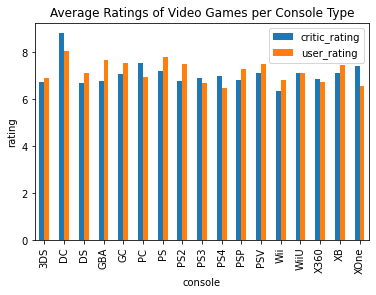

In [10]:
consoleRatings['console'] = convertURI(consoleRatings['console'])
grouped = consoleRatings.groupby(['console']).mean() 
grouped.plot.bar(y=['critic_rating', 'user_rating'])
plt.ylabel('rating')
plt.title('Average Ratings of Video Games per Console Type')
plt.show()

## 2.2: Bar Chart of Rating and Game Genre

Run the cells below to get a representation of a bar chart that shows the average rating per genre.

In [11]:
%%sparql http://localhost:7200/repositories/VGR -qs genreRatings
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT distinct ?genre ?critic_rating ?user_rating where {
    ?game rdf:type vg:VideoGame ;
         vg:hasGenre ?genre ;
         vg:hasCriticRating ?criticrating;
        vg:hasUserRating ?user_rating.
BIND ((?criticrating/10) as ?critic_rating)
} 

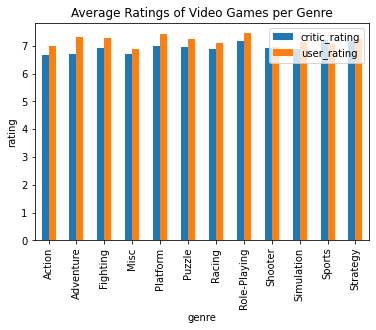

In [12]:
genreRatings['genre'] = convertURI(genreRatings['genre'])
groupedGenre = genreRatings.groupby(['genre']).mean() 
groupedGenre.plot.bar(y=['critic_rating', 'user_rating'])
plt.ylabel('rating')
plt.title('Average Ratings of Video Games per Genre')
plt.show()

## 3.1: Scatter Plot of Video Game Sales and Its User Rating

Run the cells below to get a representation of a scatter plot that shows the total sales and user rating.

In [13]:
%%sparql http://localhost:7200/repositories/VGR -qs salesRatingGenre
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT distinct ?game ?console ?sales ?userRating ?criticRating ?AVGRating ?genre where {
    ?game rdf:type vg:VideoGame ;
         vg:hasNASales ?NA ;
         vg:hasEUSales ?EU ;
         vg:hasJPSales ?JP ;
         vg:hasOtherSales ?Other ;
         vg:isPlayedOn ?console ;
         vg:hasUserRating ?userRating ;
         vg:hasCriticRating ?criticRating ;
         vg:hasGenre ?genre .
    BIND((?NA+?EU+?JP+?Other) as ?sales) .
    BIND(((?criticRating/10+?userRating)/2) as ?AVGRating) .
} 

<AxesSubplot:xlabel='sales', ylabel='userRating'>

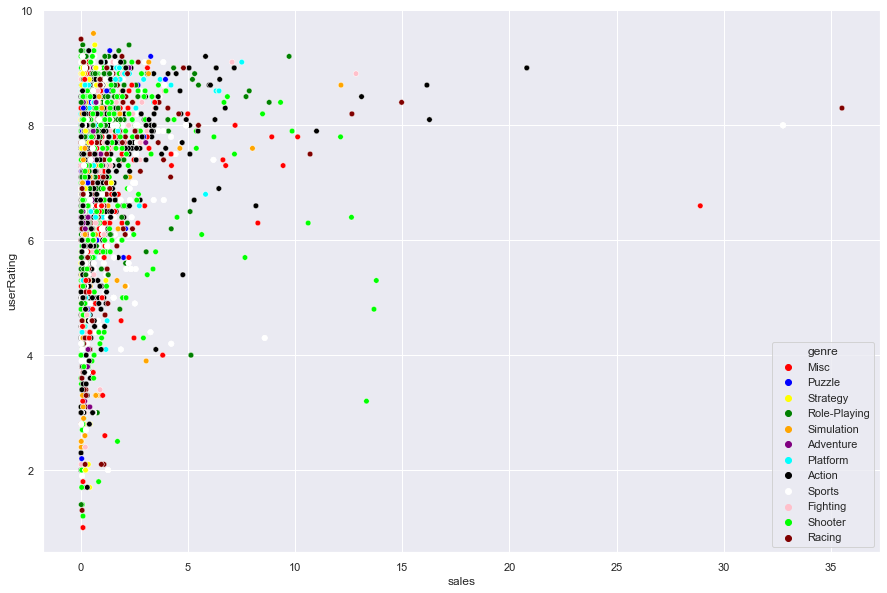

In [14]:
salesRatingGenre["game"] = convertURI(salesRatingGenre["game"])
salesRatingGenre["console"] = convertURI(salesRatingGenre["console"])
salesRatingGenre["genre"] = convertURI(salesRatingGenre["genre"])
colors = ['red', 'blue', 'yellow', 'green', 'orange', 'purple', 'cyan', 'black', 'white', 'pink', 'lime', 'maroon']
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=salesRatingGenre, x='sales', y='userRating', hue='genre', s=30, palette=colors)

## 3.2: Scatter Plot of Video Game Sales and Its Critic Rating

Run the cell below to get a representation of a scatter plot that shows the total sales and critic rating.

<AxesSubplot:xlabel='sales', ylabel='criticRating'>

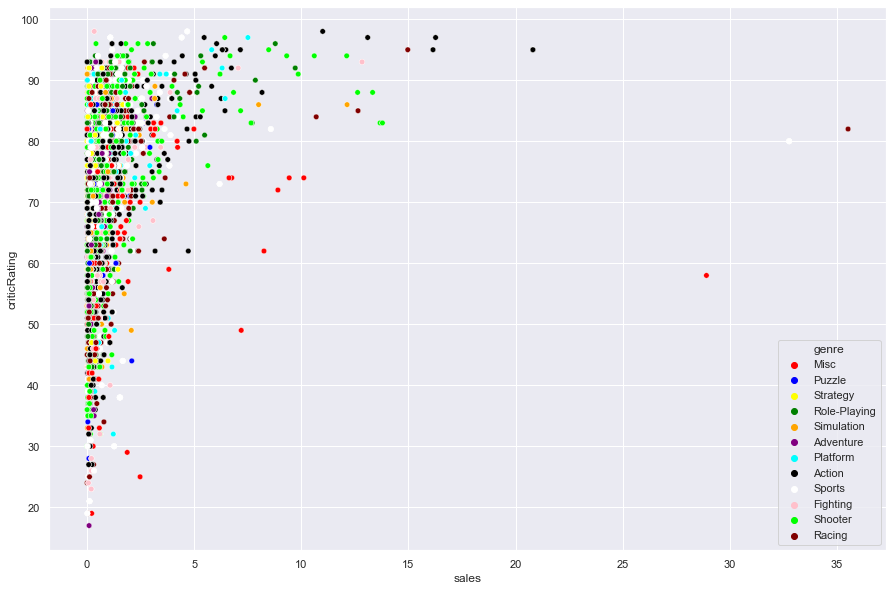

In [15]:
sns.scatterplot(data=salesRatingGenre, x='sales', y='criticRating', hue='genre', s=30, palette=colors)

## 3.3: Scatter Plot of Video Game Sales and its Average Rating

Run the cell below to get a representation of a scatter plot that shows the total sales and average rating.

<AxesSubplot:xlabel='sales', ylabel='AVGRating'>

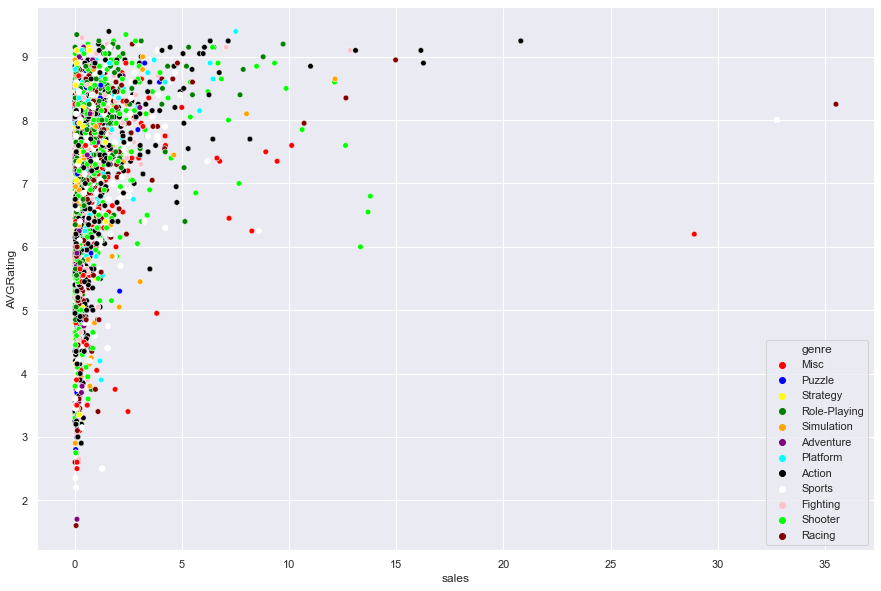

In [16]:
sns.scatterplot(data=salesRatingGenre, x='sales', y='AVGRating', hue='genre', s=30, palette=colors)

## 4.1: A World Map of Total Video Game Sales per Region

Run the cells below to get a representation of a map with the total video game sales per region.
The sales are in millions of euros and can be displayed by clicking the circles.

SPARQL query of the total video game sales per area

In [17]:
%%sparql http://localhost:7200/repositories/VGR -qs videoGameSalesPerArea
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

Select DISTINCT (SUM(?EUSales) as ?allEUSales) (SUM(?NASales) as ?allNASales) (SUM(?JPSales) as ?allJPSales) where{
    ?game rdf:type vg:VideoGame ;
          vg:hasEUSales ?EUSales ;
          vg:hasNASales ?NASales ;
          vg:hasJPSales ?JPSales . 
}

SPARQL query of the coordinates of the aforementioned areas

In [18]:
%%sparql http://query.wikidata.org/sparql -qs areaCoordinates
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wd: <http://www.wikidata.org/entity/>

Select ?EUcoordinate ?NAcoordinate ?JPcoordinate where{
    wd:Q46 wdt:P625 ?EUcoordinate .
    wd:Q49 wdt:P625 ?NAcoordinate .
    wd:Q17 wdt:P625 ?JPcoordinate .
}

In [19]:
sales = [videoGameSalesPerArea.allEUSales[0], videoGameSalesPerArea.allNASales[0], videoGameSalesPerArea.allJPSales[0]]
area_coords = [areaCoordinates.join(areaCoordinates.EUcoordinate.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float)), 
               areaCoordinates.join(areaCoordinates.NAcoordinate.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float)), 
               areaCoordinates.join(areaCoordinates.JPcoordinate.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float))]
    
m = folium.Map(location=[30, 31], zoom_start=2)
n = 0

for i in area_coords:
    for _, row in i.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius= 30,
            popup= sales[n],
            color='green',
            fill=True,
            fill_color='darkgreen',
        ).add_to(m)
        n += 1

m

## 4.2: A World Map of Video Game Developer/Publisher Headquarter and its Average Profit per Video Game.

Run the cells below to get a representation of a map with the average profit per video game per developer/publisher.
The sales are in millions of euros and can be displayed by clicking the circles.

SPARQL query of video game publisher headquarter coordinates and the total sales per publisher.

In [20]:
%%sparql http://localhost:7200/repositories/VGR -qs PubHQ
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

Select distinct ?publisherLabel ?publishercoordinates (AVG(?salesp) as ?salesp) where {
    ?publisher rdf:type vg:VideoGamePublisher ;
               rdfs:label ?publisherLabel .
    ?publisher vg:hasCoordinates ?publishercoordinates .
    ?VideoGame rdf:type vg:VideoGame ;
               vg:isPublishedBy ?publisher ;
               vg:hasNASales ?NAsalesp ;
               vg:hasEUSales ?EUsalesp ;
               vg:hasJPSales ?JPsalesp ;
               vg:hasOtherSales ?Osalesp .
    BIND((?NAsalesp + ?EUsalesp + ?JPsalesp + ?Osalesp) as ?salesp)
} GROUP BY ?publisherLabel ?publishercoordinates

SPARQL query of video game developer headquarter coordinates and the total sales per developer.

In [21]:
%%sparql http://localhost:7200/repositories/VGR -qs DevHQ
PREFIX vg: <http://www.semanticweb.org/x/VideoGame/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

Select distinct ?developerLabel ?developercoordinates (AVG(?salesd) as ?salesd) where {
    ?developer rdf:type vg:VideoGameDeveloper ;
               rdfs:label ?developerLabel .
    ?developer vg:hasCoordinates ?developercoordinates .
    ?VideoGame rdf:type vg:VideoGame ;
               vg:isDevelopedBy ?developerer ;
               vg:hasNASales ?NAsalesd ;
               vg:hasEUSales ?EUsalesd ;
               vg:hasJPSales ?JPsalesd ;
               vg:hasOtherSales ?Osalesd .
    BIND((?NAsalesd + ?EUsalesd + ?JPsalesd + ?Osalesd) as ?salesd)
} GROUP BY ?developerLabel ?developercoordinates

In [22]:
PubCor = PubHQ.publishercoordinates.str.split(" ")
DevCor = DevHQ.developercoordinates.str.split(" ")

m = folium.Map(location=[30, 31], zoom_start=2)

for i in range(len(PubHQ)):
    folium.CircleMarker(
        location=[float(PubCor[i][0]), float(PubCor[i][1])],
        radius= 10,
        popup= PubHQ.salesp[i],
        tooltip = PubHQ.publisherLabel[i],
        color='darkblue',
        fill=True,
        fill_color='cadetblue',
    ).add_to(m)

for i in range(len(DevHQ)):
    folium.CircleMarker(
        location=[float(DevCor[i][0]), float(DevCor[i][1])],
        radius= 10,
        popup= DevHQ.salesd[i],
        tooltip= DevHQ.developerLabel[i],
        color='pink',
        fill=True,
        fill_color='lightred',
    ).add_to(m)

m

Map of the sales per area and publisher and developer. The sales are millions of euros and can be displayed by clicking the circles. The name of the publisher or developer is displayed when hovering over the circle. The vlue circles are publishers and the pink circles developers. The big circles are the areas.